# "Code-Driven Object Classification Showdown"

Objective:
To use some basic coding skills and understanding of object classification and detection model in a real-world scenario.




# Install libraries

Before you can use a library in your code, you need to install it on your system.
Installation is the process of downloading and configuring the library files on your computer.
This is typically done once per environment (though it may need to be repeated if you need to update to a newer version of the library).


# You may not need to install a library in the following scenatios:

1.Standard Library Modules:
Python comes with a set of standard libraries that are included with the installation of Python. For these libraries, you don't need to perform any additional installation. Examples include math, datetime, and json.

2.Pre-installed Libraries:
If you are working in an environment where the library has already been installed, either by yourself or someone else, you don't need to install it again. This is common in shared environments, company setups, or pre-configured environments like Anaconda.

3.Built-in Modules:
Some frameworks or larger libraries come with other libraries bundled in. In these cases, you don't need to install the bundled libraries separately.

4.Using Online IDEs:
When you are using online Integrated Development Environments (IDEs) like Google Colab or Jupyter Notebooks hosted on a cloud service, many common libraries are pre-installed, and you don't need to install them unless you need a library that is not included.

5.Custom Environments:
In custom environments like Docker containers or virtual environments that have been set up with a specific set of libraries, you may not need to install anything if the libraries you need are already included.

6.Cloud Services with Pre-configured Environments:
Some cloud services offer pre-configured environments with a wide array of libraries pre-installed. In such cases, you might not need to install anything.

7.Notebooks with Binder:
If you are using a Jupyter Notebook with Binder, the libraries might be specified in a configuration file and installed automatically when the Binder environment is created

In [ ]:
# Import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Here, we import all necessary libraries and modules.
# TensorFlow is used for loading the CIFAR-10 dataset, NumPy for numerical operations,
# Matplotlib for plotting, and scikit-learn for data splitting, model training, evaluation, and fine-tuning.

In [ ]:
#load dataset
# Load CIFAR-10 dataset
# use TensorFlow's Keras API to load the CIFAR-10 dataset.
# Split  this dataset into training and testing sets, each with its respective images and labels.
 #-- your code here--





(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Why do we flatten the  labels

In [ ]:
# Preprocess the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(x_train.shape[0], -1))
x_test = scaler.transform(x_test.reshape(x_test.shape[0], -1))

#We scale the data to have a mean of 0 and a variance of 1, which often leads to better performance with k-NN.
#We also reshape the images from 3D arrays to 2D arrays as scikit-learn expects 2D input.

# Discuss the importance and how to calculate  Mean and Variance




# Function to display images from the dataset
def display_images(images, labels):
    fig, axes = plt.subplots(1, 5, figsize=(10, 5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(32, 32, 3).astype(np.uint8))
        ax.set_title(labels[i])
    plt.show()

#This function is used to display images along with their labels. It's helpful for visual verification of the data.
#This function takes in a set of images and labels, and displays the images in a single row using Matplotlib.
#Each image is reshaped back to its original dimensions (32x32x3) and
#the pixel values are cast to unsigned 8-bit integers (which is the expected format for displaying images using Matplotlib).
#This code sets up a good foundation for the subsequent steps in the assignment,
#such as filtering out specific categories of images, training a k-NN classifier, and evaluating its performance.

**The CIFAR-10 dataset is composed of 60,000 32x32 color images, categorized into 10 different classes.**
Each class has 6,000 images. The categories are as follows:

Airplane,
Automobile,
Bird,
Cat,  
Deer,
Dog,
Frog,
Horse,
Ship,
Truck.

In [ ]:
# 1. Filter out images from your assigned category (e.g., 'dog')
#    Hint: Use np.where to find indices of 'dog' labels in y_train

# --- Your code here ---
category_indices = np.where(y_train == 0)[0]  # '0' corresponds to 'airplane' in CIFAR-10
category_images = x_train[category_indices]
category_labels = y_train[category_indices]

# --- Your code here ---
# Here, we filter out the images of airplanes from the training data for visualization purposes.

In [ ]:
#2. Display some images from your assigned category using the display_images function

#-- Your Code Here --

# Task 2: Display some images from the 'airplane' category


# --- Your code here ---

#We call the display function to visualize some  images of the category you picked.

In [ ]:
# 3. Train a k-NN classifier and evaluate it
#    Hint: You can use KNeighborsClassifier from scikit-learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_values = list(range(1, 11))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))


# -- Your Code Here--
#We train k-NN classifiers for different values of k (number of neighbors)
#and evaluate them using 5-fold cross-validation to estimate the misclassification error.

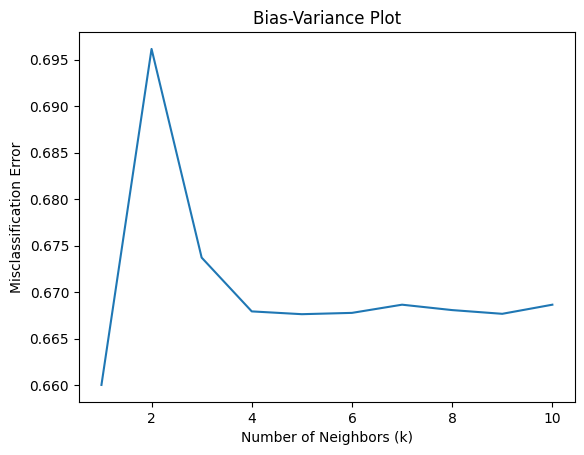

In [ ]:
# Plot bias-variance
mse = [1 - x for x in cv_scores]
plt.plot(k_values, mse)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Error')
plt.title('Bias-Variance Plot')
plt.show()

#We plot the misclassification error against k to visualize the bias-variance trade-off.

 # How Bias and Variance Come into Play'

**High Bias**: If your trained model consistently makes predictions that are off the mark for different datasets (like consistently throwing darts to the left of the bullseye), it has a high bias. It's probably oversimplifying the problem.
**ML Solution:** Use a more complex model or incorporate more features.

**High Variance:** If your model makes predictions that vary a lot for slight changes in the training data (like your darts scattering all over the board based on tiny differences in your stance or grip), it has high variance. It's probably overfitting to the training data.
**ML Solution:** Collect more data, use regularization, or choose a simpler model.

**The Role of Bias and Variance in ML:**
Model Evaluation: Understanding bias and variance helps in evaluating a model's performance. If a model has high error on the training set, it's likely due to high bias. If it performs well on the training set but poorly on the validation set, it's likely due to high variance.

**Model Improvement:** By diagnosing whether a model suffers from high bias, high variance, or both, you can take steps to improve it.

**The Trade-off:** In ML, there's often a trade-off. Reducing bias might increase variance and vice versa. The goal is to find the sweet spot where the model has a balanced bias-variance, leading to the most accurate predictions on unseen data.

Bias and variance are fundamental concepts in ML, influencing model performance, evaluation, and improvement strategies.







In [ ]:
# Fine-tuning the model using GridSearchCV
param_grid = {'n_neighbors': k_values}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

# We use GridSearchCV to perform a grid search over different values of k,
#finding the optimal k value that minimizes the misclassification error.

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

# GridSearchCV
 It is a library function provided in Scikit-Learn in Python, and it stands for Grid Search Cross Validation. It's used to find the best set of hyperparameters for a machine learning model which in turn helps to improve the model's performance.

In [ ]:
#4. (Optional) Try different values of k and observe how the classification accuracy changes



for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f'k={k}, Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')




k=1, Accuracy: 35.67%
k=2, Accuracy: 31.45%
k=3, Accuracy: 33.08%
k=4, Accuracy: 33.89%
k=5, Accuracy: 34.17%
k=6, Accuracy: 34.21%
k=7, Accuracy: 33.88%
k=8, Accuracy: 34.23%
k=9, Accuracy: 34.12%


In [ ]:
# 5.Display the optimal value of k and evaluate the model
# Hint: You can use the accuracy_score function from scikit-learn

best_k = grid.best_params_['n_neighbors']
best_knn = grid.best_estimator_
y_pred = best_knn.predict(x_test)
print(f'Optimal k: {best_k}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')


##We display the optimal k value and evaluate the best k-NN model on the test data to check its performance.
#Each step in the code is necessary to ensure proper data preparation, model training, evaluation, and fine-tuning,
#which are crucial aspects of building and understanding machine learning models

# Set a flag to indicate that the code cell has completed execution
code_completed = True

Optimal k: 1
Accuracy: 35.67%


In [ ]:
from IPython.display import display, Markdown

# Replace 'True' with your condition.
# For example, if you have a variable called 'result' and you want to display the Markdown
# only if 'result' is greater than 10, replace 'True' with 'result > 10'.
condition = True

if 'code_completed' in globals() and code_completed:
    display(Markdown("""
    ## Why do you think of this model accuracy? How can it be improved?

    How to improve Model's accuracy? Here are some suggestions on how to improve the model

    In this assignment, there could be various reasons for a low accuracy score. Here are some potential factors and suggestions on how to improve the model performance:

    - **Network Architecture**: The architecture of the neural network can significantly affect the performance. A more complex architecture with additional layers might capture the features of the data better. You could experiment with adding more convolutional layers, pooling layers, or fully connected layers to the network.

    - **Hyperparameters**: Tuning hyperparameters such as the learning rate, batch size, and the number of epochs can also help in improving the model's performance. You can use techniques like GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters.

    - **Data Augmentation**: Augmenting the training data by applying random transformations (e.g., rotation, scaling, cropping, flipping) can help the model learn more robust features and improve its generalization ability.

    - **Normalization and Preprocessing**: Ensuring that the input data is normalized and preprocessed correctly is crucial. Normalizing the pixel values of the images to a range between 0 and 1 can help in speeding up the training and improving the convergence of the model.

    - **Advanced Optimizers**: Experimenting with different optimization algorithms such as Adam, RMSprop, or Adagrad, might lead to better training convergence and improved accuracy.

    - **Regularization**: Implementing regularization techniques such as dropout or L2 regularization can help in reducing overfitting, especially in a complex network with many parameters.

    - **Transfer Learning**: Utilizing a pre-trained model on a large dataset and fine-tuning it on your specific dataset can significantly boost the performance. Models like ResNet, VGG, or MobileNet have already learned useful features from large-scale datasets and can be fine-tuned for your specific task.

    - **Evaluation Metrics**: Ensure you are using appropriate evaluation metrics for your problem. Sometimes accuracy might not be the best metric, especially in imbalanced datasets. Other metrics like precision, recall, or F1-score might provide better insights.

    - **Learning Schedule**: Implementing learning rate schedules or learning rate warm-up can help in stabilizing the training and achieving better performance.

    - **Early Stopping**: Implementing early stopping based on validation loss can prevent overfitting and save training time.
    """))



    ## Why do you think of this model accuracy? How can it be improved?

    How to improve Model's accuracy? Here are some suggestions on how to improve the model

    In this assignment, there could be various reasons for a low accuracy score. Here are some potential factors and suggestions on how to improve the model performance:

    - **Network Architecture**: The architecture of the neural network can significantly affect the performance. A more complex architecture with additional layers might capture the features of the data better. You could experiment with adding more convolutional layers, pooling layers, or fully connected layers to the network.

    - **Hyperparameters**: Tuning hyperparameters such as the learning rate, batch size, and the number of epochs can also help in improving the model's performance. You can use techniques like GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters.

    - **Data Augmentation**: Augmenting the training data by applying random transformations (e.g., rotation, scaling, cropping, flipping) can help the model learn more robust features and improve its generalization ability.

    - **Normalization and Preprocessing**: Ensuring that the input data is normalized and preprocessed correctly is crucial. Normalizing the pixel values of the images to a range between 0 and 1 can help in speeding up the training and improving the convergence of the model.

    - **Advanced Optimizers**: Experimenting with different optimization algorithms such as Adam, RMSprop, or Adagrad, might lead to better training convergence and improved accuracy.

    - **Regularization**: Implementing regularization techniques such as dropout or L2 regularization can help in reducing overfitting, especially in a complex network with many parameters.

    - **Transfer Learning**: Utilizing a pre-trained model on a large dataset and fine-tuning it on your specific dataset can significantly boost the performance. Models like ResNet, VGG, or MobileNet have already learned useful features from large-scale datasets and can be fine-tuned for your specific task.

    - **Evaluation Metrics**: Ensure you are using appropriate evaluation metrics for your problem. Sometimes accuracy might not be the best metric, especially in imbalanced datasets. Other metrics like precision, recall, or F1-score might provide better insights.

    - **Learning Schedule**: Implementing learning rate schedules or learning rate warm-up can help in stabilizing the training and achieving better performance.

    - **Early Stopping**: Implementing early stopping based on validation loss can prevent overfitting and save training time.
    

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [ ]:
# Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/50
782/782 [==============================] - 135s 170ms/step - loss: 1.7640 - accuracy: 0.0996 - val_loss: 1.3566 - val_accuracy: 0.0983
Epoch 2/50
782/782 [==============================] - 137s 176ms/step - loss: 1.4685 - accuracy: 0.1012 - val_loss: 1.5739 - val_accuracy: 0.0654
Epoch 3/50
782/782 [==============================] - 129s 164ms/step - loss: 1.3743 - accuracy: 0.1032 - val_loss: 1.2601 - val_accuracy: 0.0852
Epoch 4/50
782/782 [==============================] - 130s 166ms/step - loss: 1.3049 - accuracy: 0.1014 - val_loss: 1.3498 - val_accuracy: 0.0881
Epoch 5/50
782/782 [==============================] - 130s 167ms/step - loss: 1.2585 - accuracy: 0.1013 - val_loss: 1.1041 - val_accuracy: 0.1617
Epoch 6/50
782/782 [==============================] - 136s 173ms/step - loss: 1.2120 - accuracy: 0.1022 - val_loss: 0.9985 - val_accuracy: 0.1303
Epoch 7/50
782/782 [==============================] - 132s 169ms/step - loss: 1.1874 - accuracy: 0.1044 - val_loss: 0.9580 -

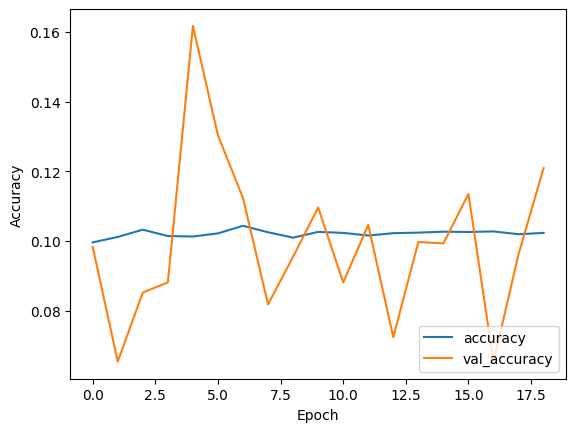

In [ ]:
# Evaluate model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


#  In this updated snippet:

Data normalization and augmentation have been added.
The model architecture has been expanded with additional layers, batch normalization, and dropout for regularization.
Early stopping is implemented to prevent overfitting.
The training is done for more epochs, but with early stopping to halt training if the model is no longer improving on the validation data.